### Guided Practice: Logit Function and Odds

In [42]:
def logit_func(odds):
    # uses a float (odds) and returns back the log odds (logit)
    return None

def sigmoid_func(logit):
    # uses a float (logit) and returns back the probability
    return None

odds_set = [
    5./1,
    20./1,
    1.1/1,
    1.8/1,
    1.6/1
]

In [43]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [44]:
lm = LogisticRegression()

df = pd.read_csv('../dataset/collegeadmissions.csv')

In [45]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [56]:
df = df.join(pd.get_dummies(df['rank']))

In [57]:
lm.fit(df[['gre', 'gpa', 1, 2, 3,]], df['admit'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [58]:
df.head()

,admit,gre,gpa,rank,rank_1,rank_2,rank_3,rank_4,1,2,3,4
0,0,380,3.61,3,0,0,1,0,0,0,1,0
1,1,660,3.67,3,0,0,1,0,0,0,1,0
2,1,800,4.00,1,1,0,0,0,1,0,0,0
3,1,640,3.19,4,0,0,0,1,0,0,0,1
4,0,520,2.93,4,0,0,0,1,0,0,0,1


In [59]:
#dropping one of the dummy vars for reference (note the double brackets)
X = df[['gre','gpa','rank_1','rank_2','rank_3']]

y = df['admit']
#fitting
lm.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
import numpy as np

In [61]:
print(lm.coef_)
print(lm.intercept_)
print(df.admit.mean())

[[  1.63913356e-03   4.33355414e-04   1.15220976e+00   5.14395668e-01
   -3.62326166e-02]]
[-2.09315184]
0.3175


In [62]:
interpretation_vector = np.exp(lm.coef_)
print(interpretation_vector)

[[ 1.00164048  1.00043345  3.16517946  1.67262737  0.96441593]]


Below is some code to walk through confusion matrices. It'll be useful for working through the Titanic problem.

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

Below the ROC curve is based on various thresholds: it shows with a false positive rate (x-axis) ~0, it also expects a true positive rate (y-axis) ~0 (the same, ish, for the top right hand of the figure).

The second chart, which does not play with thesholds, shows the one true TPR and FPR point, joined to 0,0 and 1,1.

The first chart will be more effective as you compare models and determine where the decision line should exist for the data. The second simplifies the first in case this idea of thresholds is confusing.

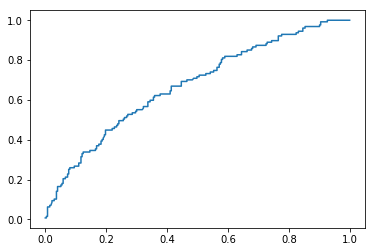

In [63]:
feature_set = df[['gre','gpa',1,2,3,]]
actuals = lm.predict(feature_set) 
probas = lm.predict_proba(feature_set)
plt.plot(roc_curve(df[['admit']], probas[:,1])[0], roc_curve(df[['admit']], probas[:,1])[1])

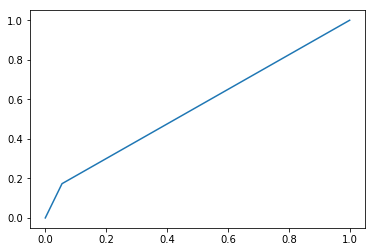

In [64]:
plt.plot(roc_curve(df[['admit']], actuals)[0], roc_curve(df[['admit']], actuals)[1])

Finally, you can use the `roc_auc_score` function to calculate the area under these curves (AUC).

In [67]:
roc_auc_score(df['admit'], lm.predict(feature_set))

0.55914164575581893

### Titanic Problem

** Goals **

1. Spend a few minutes determining which data would be most important to use in the prediction problem. You may need to create new features based on the data available. Consider using a feature selection aide in sklearn. But a worst case scenario; identify one or two strong features that would be useful to include in the model.
2. Spend 1-2 minutes considering which _metric_ makes the most sense to optimize. Accuracy? FPR or TPR? AUC? Given the business problem (understanding survival rate aboard the Titanic), why should you use this metric?
3. Build a tuned Logistic model. Be prepared to explain your design (including regularization), metric, and feature set in predicting survival using the tools necessary (such as a fit chart).

In [206]:
titanic_data = pd.read_csv('../dataset/titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [207]:
print (titanic_data[titanic_data.Survived > 1])

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


In [215]:
#getting only the relevant columns
cols_to_keep = ['Survived', 'Pclass','Sex','Age','SibSp','Parch']
model_data = titanic_data[cols_to_keep].copy()

In [216]:
#checking for null values
print(len(model_data))
print(model_data.isnull().sum())

891
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64


In [217]:
#since there is a lot of data missing, let's fill in the values (impute)
#model_data[model_data.Age.isnull()] = model_data.Age.mean()

#..or the easier way is to use hte built in function
model_data.Age = model_data.Age.fillna(method='bfill')

#now checking for null values again
print(model_data.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64


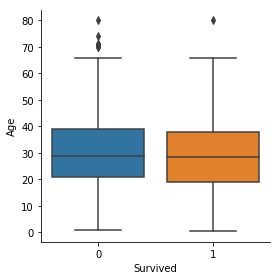

In [219]:
sns.factorplot(kind='box', data=model_data, x='Survived', y='Age')

In [220]:
#simplifying our analysis
model_data['isSibling'] = model_data['SibSp'].apply(lambda x: int(x>0))
model_data['isChild'] = model_data['Parch'].apply(lambda x: int(x>0))

model_data = pd.get_dummies(data=model_data, columns=['Sex','Pclass'], drop_first=True)

In [221]:
model_data.head()

,Survived,Age,SibSp,Parch,isSibling,isChild,Sex_male,Pclass_2,Pclass_3
0,0,22.0,1,0,1,0,1,0,1
1,1,38.0,1,0,1,0,0,0,0
2,1,26.0,0,0,0,0,0,0,1
3,1,35.0,1,0,1,0,0,0,0
4,0,35.0,0,0,0,0,1,0,1


In [233]:
#dropping one of the dummy vars for reference (note the double brackets)
X = model_data[['Age','isSibling','isChild','Sex_male']]

y = model_data['Survived']

lm = LogisticRegression(C=1e12)

#fitting
lm.fit(X, y)

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [234]:
print(np.exp(lm.coef_))

[[ 0.99591354  0.99931624  1.06131127  0.08245763]]


In [235]:
#gives the accuracy of the data
print(lm.score(X,y))

0.786756453423


In [229]:
#computing the metrics for the model
probas = lm.predict_proba(X)
roc_auc_score(y, probas[:,1])

0.7716102642763556

In [ ]:
import statsmodel.api as sm
slm = sm.Logit(endog=y, exog=)